In [257]:
# Modelo de LSMT de PIA

# Librerías que vamos utilizar durante la clase
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

# Configuración general de las figuras que representaremos
mpl.rcParams['figure.figsize'] = (20, 10)
mpl.rcParams['axes.grid'] = False

In [258]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [259]:
# Leer dataset y utilizar como índice la fecha

path = '/content/drive/MyDrive/datoscsv/'
df = pd.read_csv(path + 'airWeather_2013-2019_v3.csv', sep=';', index_col='FECHA', parse_dates=['FECHA'])

# Recuperar la fecha como campo
df.insert(0, 'FECHA', df.index.strftime('%Y-%m-%d'))

# seleccionar solo una estación de las cuatro disponibles para hacer pruebas
df = df[df['COD_ESTACION']==46250043]
df.isnull().sum()

FECHA             0
COD_ESTACION      0
NOM_ESTACION      0
SO2             144
NO              165
NO2             165
NOx             165
O3               51
PM10            171
PM2.5           214
lluvias         143
Temp            143
VelocVent       143
dtype: int64

In [260]:
df.shape

(2556, 13)

In [261]:
# eliminar lineas que tengan algun valor nulo
df = df.dropna()
df.shape

(1908, 13)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1908 entries, 2013-01-01 to 2019-12-31
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FECHA         1908 non-null   object 
 1   COD_ESTACION  1908 non-null   int64  
 2   NOM_ESTACION  1908 non-null   object 
 3   SO2           1908 non-null   float64
 4   NO            1908 non-null   float64
 5   NO2           1908 non-null   float64
 6   NOx           1908 non-null   float64
 7   O3            1908 non-null   float64
 8   PM10          1908 non-null   float64
 9   PM2.5         1908 non-null   float64
 10  lluvias       1908 non-null   float64
 11  Temp          1908 non-null   float64
 12  VelocVent     1908 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 208.7+ KB


In [263]:
# Vamos a echar un vistazo al conjunto de datos
df.head()

,FECHA,COD_ESTACION,NOM_ESTACION,SO2,NO,NO2,NOx,O3,PM10,PM2.5,lluvias,Temp,VelocVent
FECHA,,,,,,,,,,,,,
2013-01-01,2013-01-01,46250043,VALÈNCIA VIVERS,1.0,5.0,30.0,39.0,27.0,6.0,5.0,0.0,13.70,0.6
2013-01-02,2013-01-02,46250043,VALÈNCIA VIVERS,6.0,83.0,85.0,211.0,16.0,18.0,6.0,0.0,11.40,0.6
2013-05-03,2013-05-03,46250043,VALÈNCIA VIVERS,2.0,8.0,31.0,43.0,44.0,11.0,7.0,0.0,16.00,0.5
2013-05-04,2013-05-04,46250043,VALÈNCIA VIVERS,9.0,13.0,30.0,50.0,45.0,32.0,9.0,0.0,16.50,0.6
2013-06-27,2013-06-27,46250043,VALÈNCIA VIVERS,3.0,2.0,12.0,24.0,50.0,26.0,11.0,0.0,22.45,14.0


In [264]:
# Representamos la evolución de algunas características a lo largo del tiempo
# Como se ha definido la fecha como index, aparece representada en el eje x

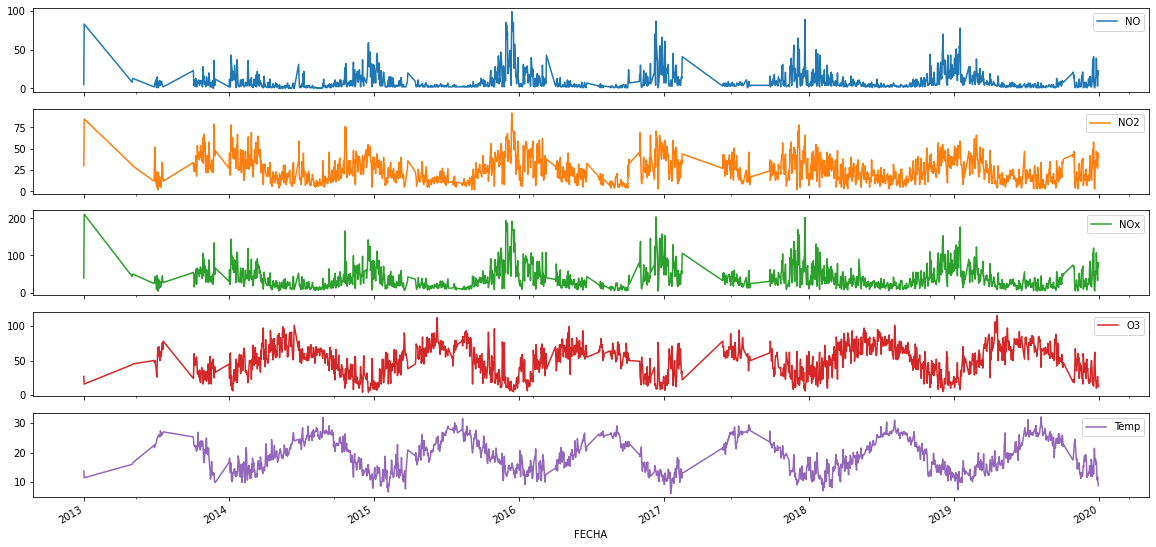

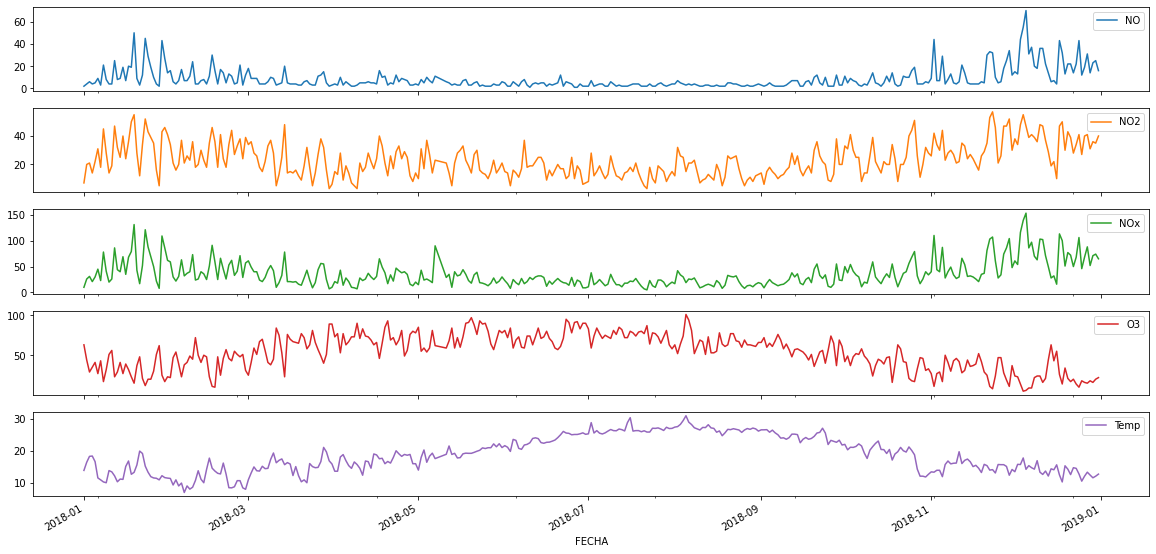

In [265]:
# Para todo el período considerado
plot_cols = ['NO', 'NO2', 'NOx', 'O3', 'Temp']
plot_features = df[plot_cols]
#plot_features.index = FECHA
_ = plot_features.plot(subplots=True)

# Para solo el año 2018
plot_features = df[plot_cols].query("index >= 20180101 and index < 20190101")
#plot_features.index = date[:365]
_ = plot_features.plot(subplots=True)
plt.show()

In [266]:
# Inspeccionamos el conjunto de datos para ver que características presenta
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
COD_ESTACION,1908.0,4.625004e+07,0.000000,46250043.00,46250043.00,4.625004e+07,46250043.00,46250043.00
SO2,1908.0,3.319706e+00,1.309675,0.00,3.00,3.000000e+00,4.00,21.00
NO,1908.0,9.039832e+00,11.639016,0.00,3.00,5.000000e+00,10.00,99.00
NO2,1908.0,2.518291e+01,14.550261,2.00,14.00,2.200000e+01,34.00,92.00
NOx,1908.0,3.851468e+01,30.474921,4.00,18.00,2.900000e+01,49.00,211.00
O3,1908.0,5.035115e+01,21.740023,4.00,34.00,5.200000e+01,67.00,115.00
PM10,1908.0,2.322327e+01,10.653303,2.00,16.00,2.200000e+01,28.00,127.00
PM2.5,1908.0,1.470760e+01,8.356239,0.04,9.00,1.300000e+01,18.00,88.00
lluvias,1908.0,1.213889e+00,6.687034,0.00,0.00,0.000000e+00,0.00,118.00
Temp,1908.0,1.890231e+01,5.522201,6.00,14.15,1.867500e+01,23.65,32.15


In [267]:
# Tiempo

# guardar las fechas en formato datetime en un objeto Series
date = pd.to_datetime(df.pop('FECHA'), format='%Y-%m-%d')

# Convertir las fechas que ya tenemos en "date" a segundos en un objeto Series
timestamp_s = date.map(pd.Timestamp.timestamp)

# Para representar la periodicidad dentro del año, se utilizan las funciones
# de seno y coseno.
day = 24*60*60         # segundos en un día
year = (365.2425)*day  # segundos en un año considerando bisiestos

df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

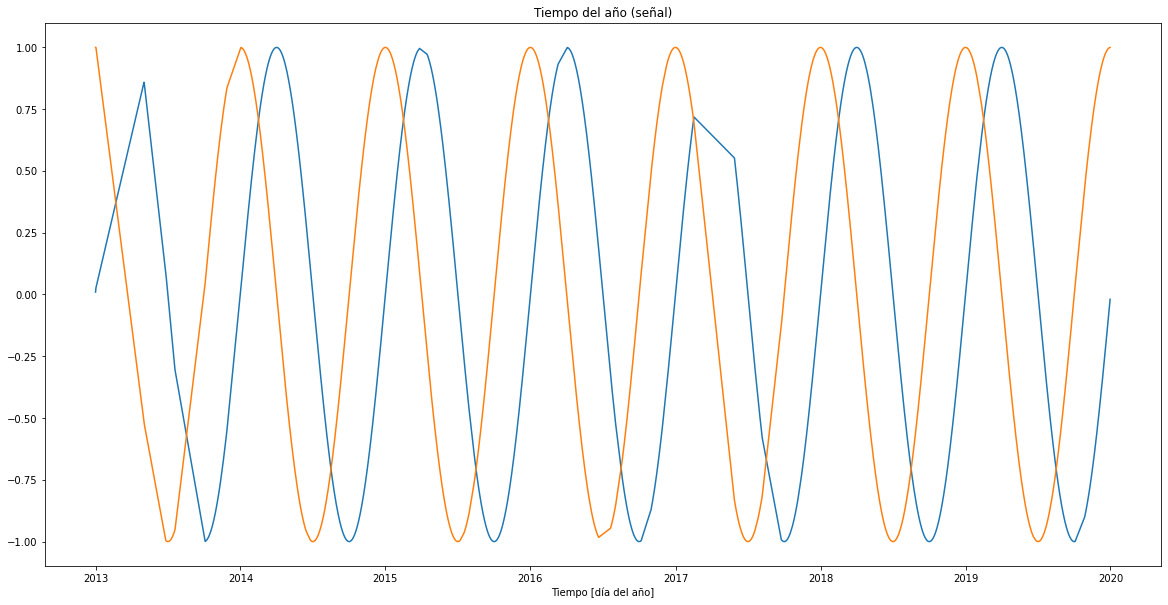

In [268]:
# Representar graficamente
#plt.plot(np.array(df['Year sin']))
#plt.plot(np.array(df['Year cos']))
plt.plot(df['Year sin'])
plt.plot(df['Year cos'])
plt.xlabel('Tiempo [día del año]')
plt.title('Tiempo del año (señal)')
plt.show()

In [269]:
df

,COD_ESTACION,NOM_ESTACION,SO2,NO,NO2,NOx,O3,PM10,PM2.5,lluvias,Temp,VelocVent,Year sin,Year cos
FECHA,,,,,,,,,,,,,,
2013-01-01,46250043,VALÈNCIA VIVERS,1.0,5.0,30.0,39.0,27.0,6.0,5.0,0.0,13.70,0.6,0.009848,0.999952
2013-01-02,46250043,VALÈNCIA VIVERS,6.0,83.0,85.0,211.0,16.0,18.0,6.0,0.0,11.40,0.6,0.027048,0.999634
2013-05-03,46250043,VALÈNCIA VIVERS,2.0,8.0,31.0,43.0,44.0,11.0,7.0,0.0,16.00,0.5,0.858842,-0.512240
2013-05-04,46250043,VALÈNCIA VIVERS,9.0,13.0,30.0,50.0,45.0,32.0,9.0,0.0,16.50,0.6,0.849904,-0.526938
2013-06-27,46250043,VALÈNCIA VIVERS,3.0,2.0,12.0,24.0,50.0,26.0,11.0,0.0,22.45,14.0,0.086743,-0.996231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,46250043,VALÈNCIA VIVERS,3.0,21.0,42.0,74.0,12.0,26.0,21.0,0.0,13.55,7.0,-0.088050,0.996116
2019-12-28,46250043,VALÈNCIA VIVERS,3.0,19.0,40.0,69.0,16.0,34.0,23.0,0.0,10.55,9.0,-0.070902,0.997483
2019-12-29,46250043,VALÈNCIA VIVERS,3.0,3.0,27.0,32.0,27.0,41.0,23.0,0.0,11.75,8.0,-0.053733,0.998555


In [270]:
# Dejar en el dataframe solamente los datos que vamos a utilizar para el modelo

# Dejar los datos más correlacionados y el momento del año
df2 = df[['NO',	'NO2',	'NOx',	'O3',	'Temp', 'Year sin', 'Year cos']]

df2

,NO,NO2,NOx,O3,Temp,Year sin,Year cos
FECHA,,,,,,,
2013-01-01,5.0,30.0,39.0,27.0,13.70,0.009848,0.999952
2013-01-02,83.0,85.0,211.0,16.0,11.40,0.027048,0.999634
2013-05-03,8.0,31.0,43.0,44.0,16.00,0.858842,-0.512240
2013-05-04,13.0,30.0,50.0,45.0,16.50,0.849904,-0.526938
2013-06-27,2.0,12.0,24.0,50.0,22.45,0.086743,-0.996231
...,...,...,...,...,...,...,...
2019-12-27,21.0,42.0,74.0,12.0,13.55,-0.088050,0.996116
2019-12-28,19.0,40.0,69.0,16.0,10.55,-0.070902,0.997483
2019-12-29,3.0,27.0,32.0,27.0,11.75,-0.053733,0.998555


In [271]:
# División del conjunto de datos
# Utilizamos una división (70%, 20%, 10%) para entrenamiento, validación y test.

column_indices = {name: i for i, name in enumerate(df2.columns)}

n = len(df2)
train_df = df2[0:int(n*0.7)]
val_df = df2[int(n*0.7):int(n*0.9)]
test_df = df2[int(n*0.9):]

num_features = df2.shape[1]

In [272]:
# Normalización de los datos
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

Algunas características tienen colas largas, pero no hay errores obvios como el valor de velocidad del viento -9999.

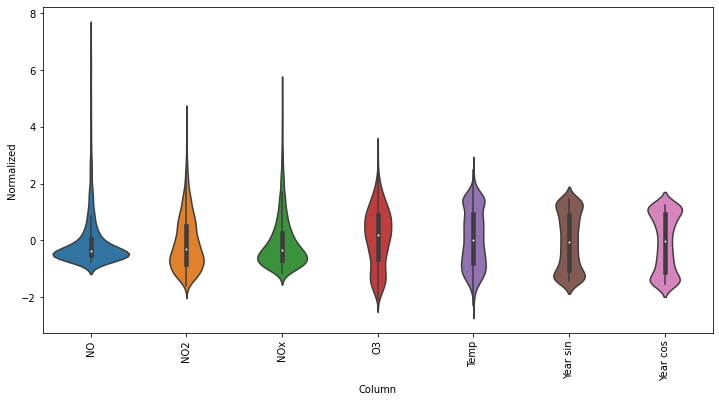

In [273]:
# Comprobar gráficamente que no hay anomalías con los datos una vez normalizados
df_std = (df2 - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df2.keys(), rotation=90)

In [274]:
# Clase WindowGenerator. Nos permite dividir el dataset en tantas ventanas
# temporales como sea posible.

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):

    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df


    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Tamaño total de la ventana: {self.total_window_size}',
        f'Índices de entrada: {self.input_indices}',
        f'Índices de salida: {self.label_indices}',
        f'Columnas de salida: {self.label_columns}'])

In [275]:
# Método que permite dado un array, dividirlo en una ventana de entradas y una
# ventana de salidas.

def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [276]:
# Método plot para visualizar como se dividen las ventanas.

def plot(self, model=None, plot_col='O3', max_subplots=3):
  inputs, labels = self.example

  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue
      
    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)
    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [277]:
# Crear tf.data.Datasets. Obtenemos nuestras series temporalas procesadas
# de tal forma que estarán listas para ser utilizadas durante el entrenamiento.

def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)
  ds = ds.map(self.split_window)
  return ds

WindowGenerator.make_dataset = make_dataset

In [278]:
# El objeto WindowGenerator contiene datos de entrenamiento, validación y prueba.
# Vamos a agregar propiedades para acceder a ellos como tf.data.Datasets usando el método make_dataset que definimos anteriormente.

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [279]:
# Se define método para compilar y entrenar cualquier modelo

MAX_EPOCHS = 10

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [280]:
# Diccionarios para almacenar resultados de cada modelo
val_performance = {}
performance = {}

In [281]:
# MODELO LSTM
# A partir de los datos de los últimos 30 días predecir el valor objetivo de los 30 días siguientes.
# Modelo multi step con RNN LSTM
# Si no coinciden los pasos de entrada con los de salida, se produce un error al compilar y entrenar
ventana = WindowGenerator(
    input_width=30,
    label_width=30,
    shift=1,
    label_columns=['O3'])

ventana

Tamaño total de la ventana: 31
Índices de entrada: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Índices de salida: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Columnas de salida: ['O3']

Text(0.5, 1.0, 'Dado un input de 30 días, estimar el valor de los 30 días siguientes')

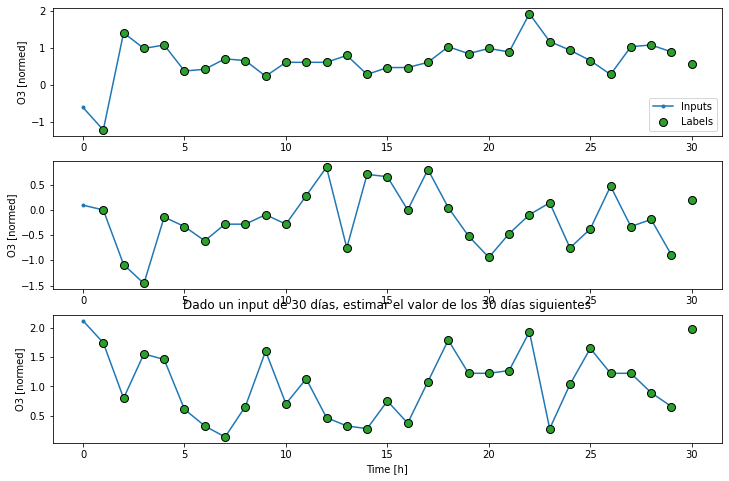

In [282]:
ventana.plot()
plt.title("Dado un input de 30 días, estimar el valor de los 30 días siguientes")

In [283]:
# Definir las capas del modelo

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [284]:
# Comprobar dimensiones de entrada y salida

print('Input shape:', ventana.example[0].shape)
print('Output shape:', lstm_model(ventana.example[0]).shape)

Input shape: (32, 30, 7)
Output shape: (32, 30, 1)


In [285]:
# Compilar y entrenar
history = compile_and_fit(lstm_model, ventana)

val_performance['LSTM'] = lstm_model.evaluate(ventana.val)
performance['LSTM'] = lstm_model.evaluate(ventana.test, verbose=0)

Epoch 1/10
41/41 [==============================] - 5s 33ms/step - loss: 0.4678 - mean_absolute_error: 0.5399 - val_loss: 0.4016 - val_mean_absolute_error: 0.5000
Epoch 2/10
41/41 [==============================] - 1s 20ms/step - loss: 0.3730 - mean_absolute_error: 0.4781 - val_loss: 0.3608 - val_mean_absolute_error: 0.4701
Epoch 3/10
41/41 [==============================] - 1s 19ms/step - loss: 0.3550 - mean_absolute_error: 0.4650 - val_loss: 0.3380 - val_mean_absolute_error: 0.4533
Epoch 4/10
41/41 [==============================] - 1s 21ms/step - loss: 0.3415 - mean_absolute_error: 0.4547 - val_loss: 0.3193 - val_mean_absolute_error: 0.4394
Epoch 5/10
41/41 [==============================] - 1s 21ms/step - loss: 0.3295 - mean_absolute_error: 0.4452 - val_loss: 0.3066 - val_mean_absolute_error: 0.4320
Epoch 6/10
41/41 [==============================] - 1s 20ms/step - loss: 0.3187 - mean_absolute_error: 0.4367 - val_loss: 0.2943 - val_mean_absolute_error: 0.4232
Epoch 7/10
41/41 [====

Text(0.5, 1.0, 'Dado un input de 30 días, estimar el valor de los 30 días siguientes')

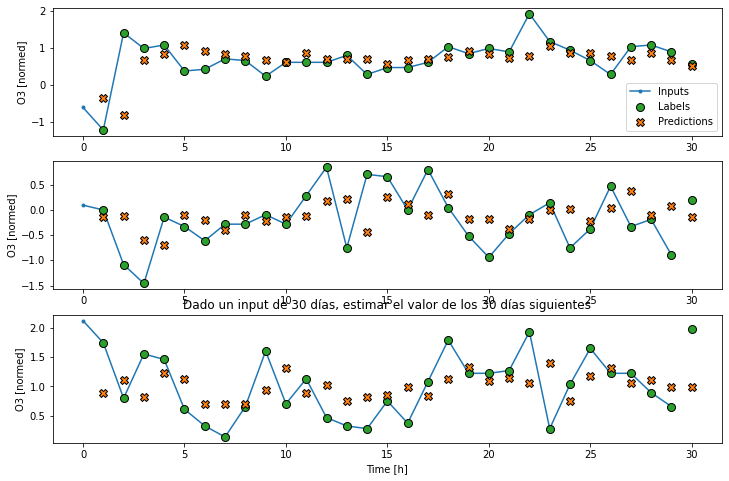

In [286]:
# Visualizar graficamente las predicciones

ventana.plot(lstm_model)
plt.title("Dado un input de 30 días, estimar el valor de los 30 días siguientes")

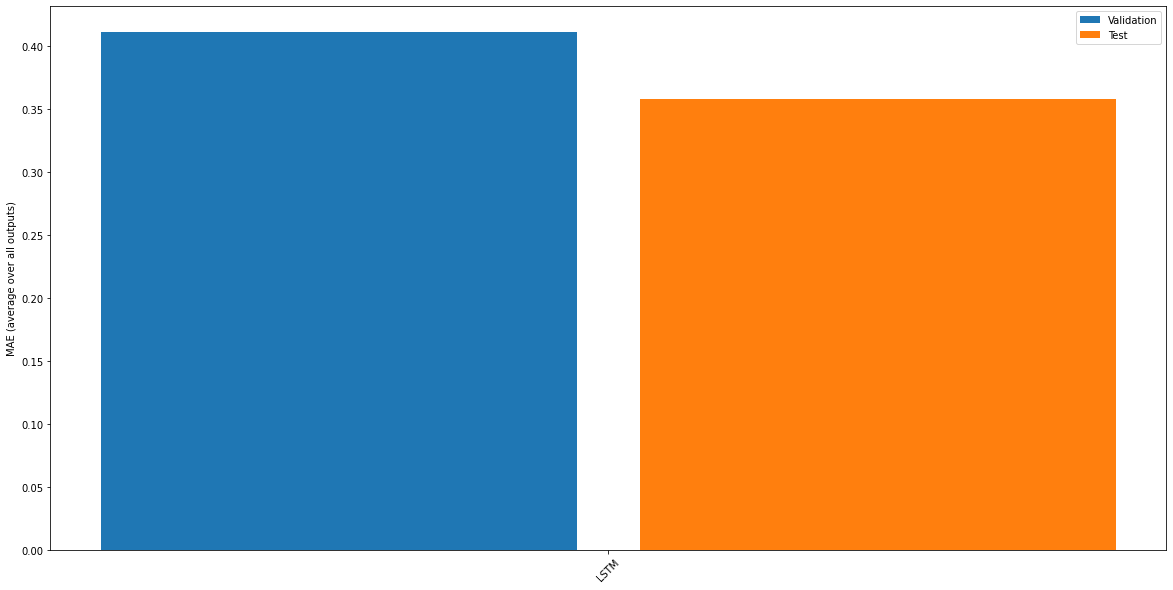

In [287]:
# Comparar graficamente MAE de los modelos utilizados
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()